In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns

import torch
from torch.autograd import Variable
import torch.utils.data as Data
import torch.nn as nn

In [152]:
df = pd.read_excel('tmp1pro.xlsx')
df.head()

,MLSS,MLVSS,turbidity,train 1 TMP,mode,train 2 TMP,mode.1,train 3 TMP,mode.2,train 4 TMP,...,flows t 3,flows t 4,tds,total nitrogen,cod inf,cod enf,enf mgd,salinity inf,Unnamed: 30,Unnamed: 31
0,-0.280713,-0.162677,-0.889879,-1.599297,pro',0.650654,stb',-1.002140,pro',-0.454365,...,0.135955,-1.53908,NaN,NaN,NaN,NaN,0.052989,NaN,NaN,01-Jan-2020'
1,-1.072436,-0.884203,-0.858822,-0.955755,pro',-0.605422,pro',-0.739955,bkp',1.195036,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.364128,NaN,NaN,NaT'
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-0.879529,-0.708911,-0.905408,-1.017045,pro',-0.632434,pro',0.904660,bkp',0.598268,...,NaN,NaN,NaN,NaN,NaN,NaN,0.293710,NaN,NaN,NaT'


In [153]:
data = df.drop(df.columns[[1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]], axis = 1)

<AxesSubplot:>

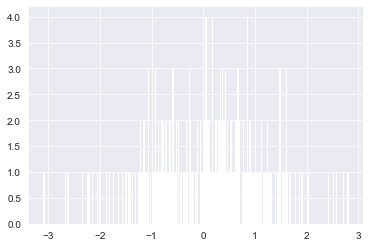

In [154]:
data['MLSS'].hist(bins=1000)

<AxesSubplot:>

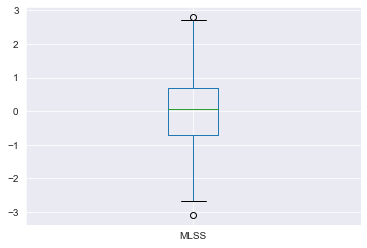

In [155]:
data.boxplot(column=['MLSS'])

In [156]:
data = data.dropna(axis = 0, how = "any")
y = data['train 1 TMP']
y = y.to_numpy()

<AxesSubplot:>

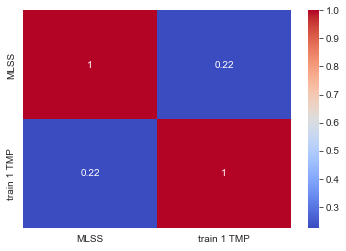

In [157]:
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [158]:
data = data.drop('train 1 TMP', axis = 1)

In [159]:
X = data.to_numpy()
X

array([[-0.28071336],
       [-1.07243621],
       [-0.87952912],
       [-0.44146927],
       [-0.726811  ],
       [-0.58213069],
       [-2.21380316],
       [-2.1495008 ],
       [-0.93177479],
       [-1.12468188],
       [-0.92373699],
       [-1.07645511],
       [-0.81522675],
       [-1.11262519],
       [-1.23319212],
       [ 1.45545046],
       [ 0.77625674],
       [ 0.89682368],
       [ 0.29398902],
       [ 0.76821895],
       [ 0.43465044],
       [ 1.22637329],
       [ 0.44268823],
       [ 0.66774651],
       [ 0.11715752],
       [ 0.98925832],
       [ 0.12519531],
       [-2.24595434],
       [ 0.46278272],
       [-3.08992287],
       [-2.6719575 ],
       [-2.62373073],
       [-2.34240789],
       [ 0.16538429],
       [-0.71475431],
       [-2.02089607],
       [-1.2653433 ],
       [-1.73957323],
       [-1.64311969],
       [-0.92775589],
       [-0.48567714],
       [-0.83532124],
       [-0.96794487],
       [-0.96392597],
       [-0.97598266],
       [-0

In [160]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.20, random_state=0)

In [161]:
pd.DataFrame(data={'Set':['X_train','X_test','y_train','y_test'],
                   'Shape':[train_X.shape, test_X.shape, train_y.shape, test_y.shape]}).set_index('Set').T

Set,X_train,X_test,y_train,y_test
Shape,"(240, 1)","(61, 1)","(240,)","(61,)"


In [162]:
# this is for the train set.
tensor_X = torch.from_numpy(train_X).float()
tensor_y = torch.from_numpy(train_y).float()
print(tensor_X.shape, tensor_y.shape)

torch.Size([240, 1]) torch.Size([240])


In [163]:
tensor_y = tensor_y.unsqueeze(1)
print(tensor_X.shape, tensor_y.shape)

torch.Size([240, 1]) torch.Size([240, 1])


In [164]:

torch_dataset = Data.TensorDataset(tensor_X, tensor_y)

In [165]:
batch = 24

In [166]:
loader = Data.DataLoader(
    dataset = torch_dataset,      # torch TensorDataset format
    batch_size = batch,           # mini batch size
    shuffle=True,                 # random shuffle for training
    num_workers=2,                # subprocesses for loading data
)

In [167]:
model = nn.Sequential(nn.Linear(1, 188), # first layer
                      nn.ReLU(),
                      nn.Linear(188, 188), # second layer
                      nn.ReLU(),
                      nn.Linear(188, 1), # third layer  # fourth layer
                      )

In [168]:
optimizer = torch.optim.Adadelta(model.parameters(), lr=.020030976568375942)
loss_function = torch.nn.MSELoss()

In [169]:
loss_lst = []
for epoch in range(1, 256):
    batch = 1
    print("Epoch", epoch)
    for step, (batch_x, batch_y) in enumerate(loader):
        var_X, var_y = Variable(batch_x), Variable(batch_y)
        prediction = model(var_X)
        rmse_loss = torch.sqrt(loss_function(prediction, var_y))

        optimizer.zero_grad()
        rmse_loss.backward()
        optimizer.step()

        loss_lst.append(float(rmse_loss))
        print("Batch: ", batch, ", loss: ", rmse_loss)
        batch += 1
    print("Result of the last epoch's batch: ", rmse_loss)
    print(' ')

Epoch 1
Batch:  1 , loss:  tensor(0.7908, grad_fn=<SqrtBackward0>)
Batch:  2 , loss:  tensor(0.8216, grad_fn=<SqrtBackward0>)
Batch:  3 , loss:  tensor(0.7357, grad_fn=<SqrtBackward0>)
Batch:  4 , loss:  tensor(0.9287, grad_fn=<SqrtBackward0>)
Batch:  5 , loss:  tensor(0.6328, grad_fn=<SqrtBackward0>)
Batch:  6 , loss:  tensor(0.7038, grad_fn=<SqrtBackward0>)
Batch:  7 , loss:  tensor(0.6716, grad_fn=<SqrtBackward0>)
Batch:  8 , loss:  tensor(0.9913, grad_fn=<SqrtBackward0>)
Batch:  9 , loss:  tensor(0.7203, grad_fn=<SqrtBackward0>)
Batch:  10 , loss:  tensor(0.6837, grad_fn=<SqrtBackward0>)
Result of the last epoch's batch:  tensor(0.6837, grad_fn=<SqrtBackward0>)
 
Epoch 2
Batch:  1 , loss:  tensor(0.7287, grad_fn=<SqrtBackward0>)
Batch:  2 , loss:  tensor(0.5608, grad_fn=<SqrtBackward0>)
Batch:  3 , loss:  tensor(0.6836, grad_fn=<SqrtBackward0>)
Batch:  4 , loss:  tensor(0.6100, grad_fn=<SqrtBackward0>)
Batch:  5 , loss:  tensor(0.5771, grad_fn=<SqrtBackward0>)
Batch:  6 , loss:  te

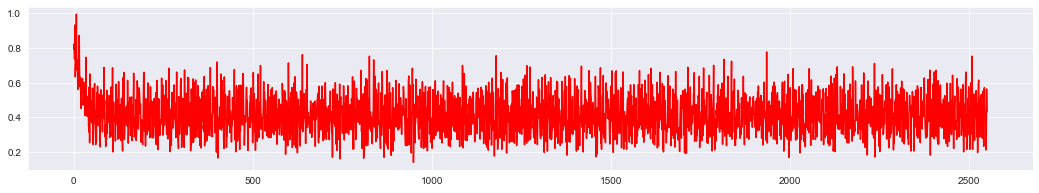

In [170]:
plt.figure(figsize=(18,3))
plt.plot(loss_lst, c='red')
plt.show()

In [183]:
# this is for the test set.
tensor_X_test = torch.from_numpy(test_X).float()
tensor_y_test = torch.from_numpy(test_y).float()
print(tensor_X_test.shape, tensor_y_test.shape)

tensor_y_test = tensor_y_test.unsqueeze(1)
print(tensor_X_test.shape, tensor_y_test.shape)

torch.Size([61, 1]) torch.Size([61])
torch.Size([61, 1]) torch.Size([61, 1])


In [184]:
var_X_test = Variable(tensor_X_test)
var_y_test = Variable(tensor_y_test)

In [185]:
predictions_test = model(var_X_test)

In [186]:
rmse_loss = torch.sqrt(loss_function(predictions_test, var_y_test))

In [187]:
rmse_loss

tensor(0.3623, grad_fn=<SqrtBackward0>)

In [188]:
y_pred = predictions_test.tolist()

In [189]:
y_real = var_y_test.tolist()

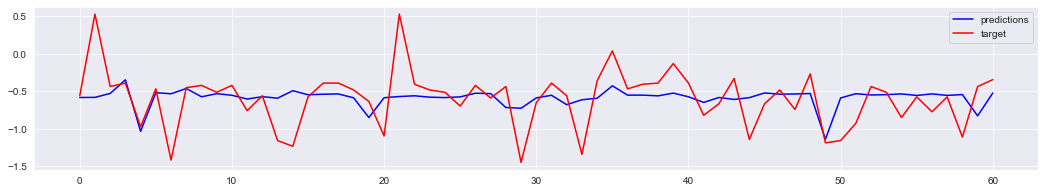

In [190]:
plt.figure(figsize=(18,3))
plt.plot(y_pred, c='blue', label="predictions")
plt.plot(y_real, c='red', label="target")
plt.legend(loc="upper right")
plt.show()

In [191]:
data_x = var_X_test[0]
data_x

tensor([0.4146])

In [192]:
prediction = model(data_x)

In [193]:
print("Target value: ", var_y_test[0])
print("Prediction: ", prediction)

Target value:  tensor([-0.5574])
Prediction:  tensor([-0.5807], grad_fn=<AddBackward0>)


In [195]:
from sklearn import metrics
def Metrics(var_y_test, y_pred):
    return pd.DataFrame({'Explained Variance' : [metrics.explained_variance_score(var_y_test, y_pred)],
                         'Max Error' : [metrics.max_error(var_y_test, y_pred)],
                         'Mean Absolute Error (MAE)' : [metrics.mean_absolute_error(var_y_test, y_pred)],
                         'Mean Squared Error (MSE)' : [metrics.mean_squared_error(var_y_test, y_pred)],
                         '$R^2$' : [metrics.r2_score(var_y_test, y_pred)],
                         ' RMSE' : [metrics.mean_squared_error(var_y_test, y_pred, squared=False)]}, index = ['Value'])
display(Metrics(var_y_test, y_pred).round(2))

,Explained Variance,Max Error,Mean Absolute Error (MAE),Mean Squared Error (MSE),$R^2$,RMSE
Value,0.08,1.11,0.25,0.13,0.08,0.36
